In [1]:
from imblearn.over_sampling import SMOTE
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
Train_df = pd.read_csv('train.csv')
Test_df  = pd.read_csv('test.csv')
print([Train_df.shape,Test_df.shape])

[(1521787, 23), (421665, 22)]


In [3]:
# Creating Bool Series True for NaN values 
Bool_Series = pd.notnull(Train_df)   
# Filtering data 
Train_df[Bool_Series] 

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004
5,0,78377,2295,465.62,5,0,N,2,N,N,...,0,6,104918.0,451,0,N,5817,102,0,2943
6,6411,94435,49219,1806.49,3,62,N,4,N,N,...,0,6,172624.0,339,0,N,5865,102,0,1622153
7,6769,112032,177989,526.88,6,62,N,2,N,N,...,0,7,34933.0,373,79200,N,5817,102,0,57795
8,6092,92294,85535,201.39,2,62,N,2,N,N,...,0,6,64652.0,264,8335,N,3585,102,0,836165
9,0,16279,110755,465.62,5,0,N,2,N,N,...,0,10,104447.0,451,0,N,5817,102,0,4507


In [4]:
Train_df.isnull().any() 

acqic        False
bacno        False
cano         False
conam        False
contp        False
csmcu        False
ecfg         False
etymd        False
flbmk         True
flg_3dsmk     True
fraud_ind    False
hcefg        False
insfg        False
iterm        False
locdt        False
loctm        False
mcc          False
mchno        False
ovrlt        False
scity        False
stocn        False
stscd        False
txkey        False
dtype: bool

In [5]:
Test_df.isnull().any() 

acqic        False
bacno        False
cano         False
conam        False
contp        False
csmcu        False
ecfg         False
etymd        False
flbmk         True
flg_3dsmk     True
hcefg        False
insfg        False
iterm        False
locdt        False
loctm        False
mcc          False
mchno        False
ovrlt        False
scity        False
stocn        False
stscd        False
txkey        False
dtype: bool

In [6]:
Train_Sector = Train_df["flbmk"].value_counts()
Train_Sector1 = Train_df["flg_3dsmk"].value_counts()
Test_Sector = Train_df["flbmk"].value_counts()
Test_Sector1 = Train_df["flg_3dsmk"].value_counts()
print(Train_Sector)
print(Train_Sector1)
print(Test_Sector)
print(Test_Sector1)

N    1504133
Y       5073
Name: flbmk, dtype: int64
N    1444867
Y      64339
Name: flg_3dsmk, dtype: int64
N    1504133
Y       5073
Name: flbmk, dtype: int64
N    1444867
Y      64339
Name: flg_3dsmk, dtype: int64


In [7]:
NaN = ["flbmk" , "flg_3dsmk"]
for N in NaN:
    Train_df[N].fillna("N", inplace=True)
    
for N in NaN:
    Test_df[N].fillna("N", inplace=True)

In [8]:
Train_df.isnull().any()

acqic        False
bacno        False
cano         False
conam        False
contp        False
csmcu        False
ecfg         False
etymd        False
flbmk        False
flg_3dsmk    False
fraud_ind    False
hcefg        False
insfg        False
iterm        False
locdt        False
loctm        False
mcc          False
mchno        False
ovrlt        False
scity        False
stocn        False
stscd        False
txkey        False
dtype: bool

In [9]:
Test_df.isnull().any()

acqic        False
bacno        False
cano         False
conam        False
contp        False
csmcu        False
ecfg         False
etymd        False
flbmk        False
flg_3dsmk    False
hcefg        False
insfg        False
iterm        False
locdt        False
loctm        False
mcc          False
mchno        False
ovrlt        False
scity        False
stocn        False
stscd        False
txkey        False
dtype: bool

In [10]:
Train_df.dtypes

acqic          int64
bacno          int64
cano           int64
conam        float64
contp          int64
csmcu          int64
ecfg          object
etymd          int64
flbmk         object
flg_3dsmk     object
fraud_ind      int64
hcefg          int64
insfg         object
iterm          int64
locdt          int64
loctm        float64
mcc            int64
mchno          int64
ovrlt         object
scity          int64
stocn          int64
stscd          int64
txkey          int64
dtype: object

In [11]:
Train_Drop= Train_df.drop(['stscd','txkey'],axis='columns')
Test_Drop= Test_df.drop(['stscd','txkey'],axis='columns')
Train_Drop.dtypes

acqic          int64
bacno          int64
cano           int64
conam        float64
contp          int64
csmcu          int64
ecfg          object
etymd          int64
flbmk         object
flg_3dsmk     object
fraud_ind      int64
hcefg          int64
insfg         object
iterm          int64
locdt          int64
loctm        float64
mcc            int64
mchno          int64
ovrlt         object
scity          int64
stocn          int64
dtype: object

In [12]:
A_1 = Train_df["contp"].value_counts()
Test_Count1 = Test_df["iterm"].value_counts()
Test_Count2 = Test_df["stscd"].value_counts()
Test_Count2

0    416461
2      5000
1       167
3        33
4         4
Name: stscd, dtype: int64

In [13]:
A=Train_Drop.groupby("contp")["fraud_ind"].sum()
B=Train_Drop.groupby("iterm")['fraud_ind'].sum()
C=Train_df.groupby("stscd")['fraud_ind'].sum()
D=Train_Drop.groupby("hcefg")['fraud_ind'].sum()
B

iterm
0    20318
1        2
2       34
3        0
4        1
5        0
6        0
7        0
8        0
Name: fraud_ind, dtype: int64

In [14]:
B.shape

(9,)

In [15]:
print(Train_Drop.shape,Test_Drop.shape)

(1521787, 21) (421665, 20)


In [16]:
#Train Column_gd
C_gd = pd.get_dummies(Train_df['stscd'])
Train_Join=Train_Drop.join(C_gd)
Train_Join.shape

(1521787, 26)

In [17]:
#Test Column_gd
C_gd = pd.get_dummies(Test_df['stscd'])
Test_Join=Test_Drop.join(C_gd)
Test_Join.shape

(421665, 25)

In [18]:
Train = pd.get_dummies(Train_Join)
Test = pd.get_dummies(Test_Join)
Train

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,...,ecfg_N,ecfg_Y,flbmk_N,flbmk_Y,flg_3dsmk_N,flg_3dsmk_Y,insfg_N,insfg_Y,ovrlt_N,ovrlt_Y
0,6881,113261,38038,513.80,5,0,0,0,5,0,...,1,0,1,0,1,0,1,0,1,0
1,0,134508,45725,465.62,5,0,2,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,6881,15408,188328,513.80,5,0,0,0,5,0,...,1,0,1,0,1,0,1,0,1,0
3,6716,157159,29967,1016.11,5,62,5,0,5,0,...,1,0,1,0,1,0,1,0,1,0
4,5975,105985,81305,713.66,5,62,4,0,5,0,...,1,0,1,0,1,0,1,0,1,0
5,0,78377,2295,465.62,5,0,2,0,0,0,...,1,0,1,0,1,0,1,0,1,0
6,6411,94435,49219,1806.49,3,62,4,0,5,0,...,1,0,1,0,1,0,1,0,1,0
7,6769,112032,177989,526.88,6,62,2,0,5,0,...,1,0,1,0,1,0,1,0,1,0
8,6092,92294,85535,201.39,2,62,2,0,5,0,...,1,0,1,0,1,0,1,0,1,0
9,0,16279,110755,465.62,5,0,2,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [19]:
y = Train.pop('fraud_ind')
X = Train

In [20]:
train, valid, trainY, validY = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [21]:
import xgboost as xgb

dtrain = xgb.DMatrix(train, label=trainY)
dvalid = xgb.DMatrix(valid, label=validY)
#dtest = xgb.DMatrix(test, label=testY)

## fixed parameters
scale_pos_weight = sum(trainY==0)/sum(trainY==1)  
num_rounds=10 # number of boosting iterations

param = {'silent':1,
         'min_child_weight':1, ## unbalanced dataset
         'objective':'binary:logistic',
         'eval_metric':'auc', 
         'scale_pos_weight':scale_pos_weight}

def do_train(param, train,train_s,trainY,valid,valid_s,validY):
    ## train with given fixed and variable parameters
    ## and report performance on validation dataset
    evallist  = [(train,train_s), (valid,valid_s)]
    model = xgb.train( param, train, num_boost_round=num_rounds, 
                      evals=evallist )    
    preds = model.predict(valid)
    labels = valid.get_label()
      
    act_pos=sum(validY==1)
    act_neg=valid.num_row()-act_pos
    true_pos=sum(1 for i in range(len(preds)) if (preds[i]>=0.5) & (labels[i]==1))
    false_pos=sum(1 for i in range(len(preds)) if (preds[i]>=0.5) & (labels[i]==0))
    false_neg=act_pos-true_pos
    true_neg=act_neg-false_pos
    
    ## precision: tp/(tp+fp) percentage of correctly classified predicted positives
    ## recall: tp/(tp+fn) percentage of positives correctly classified
    ## F-score with beta=1
    ## see Sokolova et al., 2006 "Beyond Accuracy, F-score and ROC:
    ## a Family of Discriminant Measures for Performance Evaluation"
    ## fscore <- 2*precision.neg*recall.neg/(precision.neg+recall.neg)
    
    precision = true_pos/(true_pos+false_pos)
    recall = true_pos/(true_pos+false_neg)
    f_score = 2*precision*recall/(precision+recall)  
    
    print('\nconfusion matrix')
    print('----------------')
    print( 'tn:{:6d} fp:{:6d}'.format(true_neg,false_pos))
    print( 'fn:{:6d} tp:{:6d}'.format(false_neg,true_pos))
    return(f_score)    

In [22]:
from collections import OrderedDict
from xgboost import XGBClassifier

best_model =  XGBClassifier()
## parameters to be tuned
tune_dic = OrderedDict()

tune_dic['max_depth']= np.array([20,25,30]) ## maximum tree depth
tune_dic['colsample_bytree']= np.linspace(0.5,1.0,6) ## subsample ratio of columns
tune_dic['eta']= np.linspace(0.3,0.6,4) ## learning rate

best_params = dict()
best_f_score = -1

import itertools
var_params = [ i for i in itertools.product(*tune_dic.values())]
search=np.random.choice(np.arange(len(var_params)),10,replace=False)

columns=[*tune_dic.keys()]+['F Score']

results = pd.DataFrame(index=range(len(search)), columns=columns) ## to check results

for i in range(len(search)): ## len(search)
    
    for (key,val) in zip(tune_dic.keys(),var_params[search[i]]):
        param[key]=val

    print()    
    #f_score = do_train(param, dtrain,'train',trainY,dvalid,'valid',validY)
    #do_train(param, train,train_s,trainY,valid,valid_s,validY):
    
    evallist  = [(dtrain,'train'), (dvalid,'valid')]
    
    model = xgb.train( param, dtrain, num_boost_round=num_rounds, 
                      evals=evallist )    
    preds = model.predict(dvalid)
    labels = dvalid.get_label()
      
    act_pos=sum(validY==1)p
    act_neg=dvalid.num_row()-act_pos
    true_pos=sum(1 for i in range(len(preds)) if (preds[i]>=0.5) & (labels[i]==1))
    false_pos=sum(1 for i in range(len(preds)) if (preds[i]>=0.5) & (labels[i]==0))
    false_neg=act_pos-true_pos
    true_neg=act_neg-false_pos
    
    ## precision: tp/(tp+fp) percentage of correctly classified predicted positives
    ## recall: tp/(tp+fn) percentage of positives correctly classified
    ## F-score with beta=1
    ## see Sokolova et al., 2006 "Beyond Accuracy, F-score and ROC:
    ## a Family of Discriminant Measures for Performance Evaluation"
    ## fscore <- 2*precision.neg*recall.neg/(precision.neg+recall.neg)
    
    precision = true_pos/(true_pos+false_pos)
    recall = true_pos/(true_pos+false_neg)
    f_score = 2*precision*recall/(precision+recall)  
    
    print('\nconfusion matrix')
    print('----------------')
    print( 'tn:{:6d} fp:{:6d}'.format(true_neg,false_pos))
    print( 'fn:{:6d} tp:{:6d}'.format(false_neg,true_pos))

    
    
    results.loc[i,[*tune_dic.keys()]]=var_params[search[i]]
    results.loc[i,'F Score']=f_score
    
    if f_score > best_f_score:
        best_model = model
        best_f_score = f_score
        print('\n*** better f-score',f_score)
        for (key,val) in zip(tune_dic.keys(),var_params[search[i]]):
            best_params[key]=val        
            print(key,': ',val,' ',end='')
        print()    


[0]	train-auc:0.994709	valid-auc:0.972365
[1]	train-auc:0.997781	valid-auc:0.968767
[2]	train-auc:0.999072	valid-auc:0.969229
[3]	train-auc:0.999338	valid-auc:0.970683
[4]	train-auc:0.999491	valid-auc:0.975844
[5]	train-auc:0.999585	valid-auc:0.979907
[6]	train-auc:0.999665	valid-auc:0.982516
[7]	train-auc:0.999759	valid-auc:0.984709
[8]	train-auc:0.999803	valid-auc:0.984962
[9]	train-auc:0.999833	valid-auc:0.987204

confusion matrix
----------------
tn:298592 fp:  1695
fn:   760 tp:  3311

*** better f-score 0.729536190371268
max_depth :  30  colsample_bytree :  0.6  eta :  0.3  

[0]	train-auc:0.990491	valid-auc:0.969093
[1]	train-auc:0.996333	valid-auc:0.960159
[2]	train-auc:0.997963	valid-auc:0.967269
[3]	train-auc:0.998729	valid-auc:0.971642
[4]	train-auc:0.999197	valid-auc:0.97464
[5]	train-auc:0.999452	valid-auc:0.976167
[6]	train-auc:0.999668	valid-auc:0.979925
[7]	train-auc:0.999784	valid-auc:0.981903
[8]	train-auc:0.999873	valid-auc:0.984455
[9]	train-auc:0.999904	valid-auc:

In [23]:
testY = pd.read_csv("test.csv")
testY

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,102,215328.0,457,59360,N,0,102,0,592489
1,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,102,222007.0,457,59360,N,0,102,0,592452
2,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,100,170013.0,457,59360,N,0,102,0,590212
3,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,100,165914.0,457,59360,N,0,102,0,590209
4,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,102,215311.0,457,59360,N,0,102,0,592488
5,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,102,222541.0,457,59360,N,0,102,2,592460
6,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,100,162903.0,457,59360,N,0,102,0,590160
7,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,102,222022.0,457,59360,N,0,102,0,592453
8,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,95,182629.0,457,59360,N,0,102,0,585745
9,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,102,221853.0,457,59360,N,0,102,0,592451


In [24]:
testY = pd.read_csv("test.csv")
dtest = xgb.DMatrix(Test)

In [25]:
preds = best_model.predict(dtest)

In [26]:
for i in range(421665):
    if preds[i] > 0.5:
        preds[i] = 1
    else:
        preds[i] = 0

In [27]:
Predictions = pd.DataFrame(preds, columns=['fraud_ind'])
Result = pd.read_csv('test.csv')
Predictions = pd.concat((Result.iloc[:,-1], Predictions), axis = 1)
Predictions.to_csv('XGBoost.csv', sep=",", index = False)

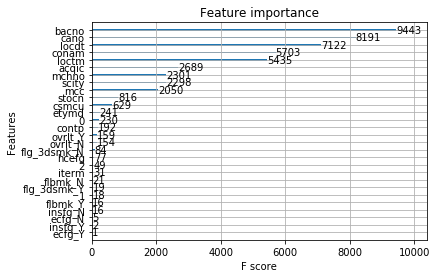

In [28]:
# import the plot_importance function to visualize the feature importance
from xgboost import plot_importance
plot_importance(model)
plt.show()